In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

***Data section***

---



In [2]:
iris = load_iris()
data, labels = iris.data, iris.target

In [5]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42,
                       stratify=labels)

In [11]:
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


***Classifiers***

---



In [30]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC accuracy: 96.67%
------------------------------
Linear SVC confusion matrix
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


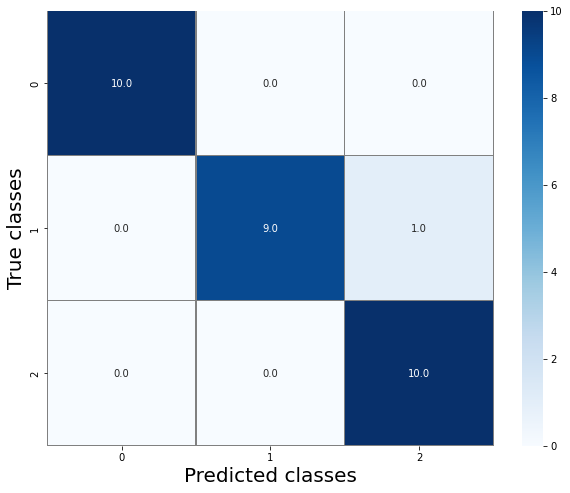

In [37]:
#Linear SVC
model1 = LinearSVC()

score1 = model1.fit(train_data, train_labels).score(test_data, test_labels)
y_model1= model1.fit(train_data, train_labels).predict(test_data)


print('LinearSVC accuracy: %.2f%%' % (score1*100))


#Linear SVC confusion matrix
print('------------------------------')
print('Linear SVC confusion matrix')
model1ConfusionMatrix = confusion_matrix(test_labels, y_model1)
plt.figure(figsize = (10,8))
sns.heatmap(model1ConfusionMatrix, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(model1ConfusionMatrix)

----------------KNeighborsClassifier--------------
KNeighborsClassifier accuracy: 100.00%
------------------------------
KNN confusion matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


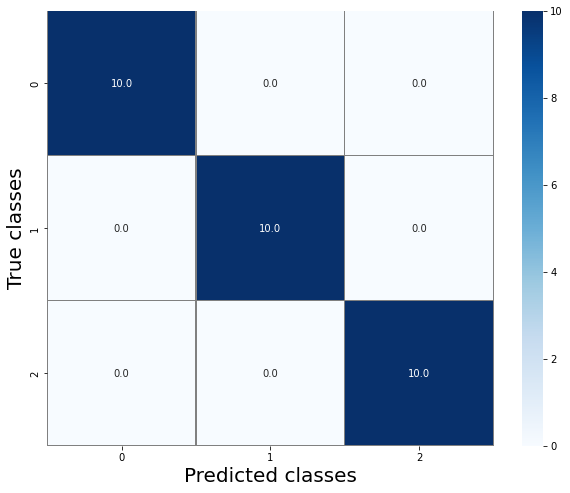

In [38]:
#KNN
print('----------------KNeighborsClassifier--------------')
model2 = KNeighborsClassifier(n_neighbors=10)

score2 = model2.fit(train_data, train_labels).score(test_data, test_labels)
y_model2= model2.fit(train_data, train_labels).predict(test_data)

print('KNeighborsClassifier accuracy: %.2f%%' % (score2.mean()*100))

#KNN confusion matrix
print('------------------------------')
print('KNN confusion matrix')
model2ConfusionMatrix = confusion_matrix(test_labels, y_model2)
plt.figure(figsize = (10,8))
sns.heatmap(model2ConfusionMatrix, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(model2ConfusionMatrix)


 5x2cv paired t test 

---



------------------> **5x2cv paired t test** <------------------

In [43]:
from mlxtend.evaluate import paired_ttest_5x2cv
from mlxtend.data import iris_data

#Statistical test
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=data, y=labels, scoring='accuracy', random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.392
p value: 0.711


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

***McNemar test***

---



In [45]:
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

In [47]:
#McNemar test
print('----------------McNemar test--------------')
# Tabla de McNemar
tb = mcnemar_table(y_target=test_labels, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)

# Cálculo de valor de Xi
chi2, p = mcnemar(ary=tb, exact=True, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

----------------McNemar test--------------
[[29  1]
 [ 0  0]]
chi-squared: 0
p-value: 1.0
